In [ ]:
**standardization &narmalization**
- standadization and normalization are two methods to convert data values into same scale
- it is also calling scaling of data
- in the data we have many coluns are there, each column has different units as well as different values
- for example you have age and salary, age is very minimal number two digit number
- and salary is kind of 5 digit number
- when you multiply 2 digit number with 5 digit number it involves some complexity
- imagine you are multiplying both are single digit number ,this involve less complexity
- scaling converts  all the data into a scale
-**standadization **
  - it is also callesd z-score or z-scale
  - it ranges -3 to 3
  - the mean=0 std=1
  -  
    

    
    -**normalization**
- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**z-score**

In [5]:
mean=visa_df['prevailing_wage'].mean()
std=visa_df['prevailing_wage'].std()
Nr=visa_df['prevailing_wage']-mean
out=Nr/std
visa_df['prevailing_wage_Zscore']=out
visa_df[['prevailing_wage','prevailing_wage_Zscore']]

,prevailing_wage,prevailing_wage_Zscore
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


In [6]:
max_original=visa_df['prevailing_wage'].max()
max_z=visa_df['prevailing_wage_Zscore'].max()
max_original,max_z

(319210.27, 4.634101837909902)

In [7]:
visa_df['prevailing_wage'].idxmax()

21077

In [8]:
visa_df['prevailing_wage_Zscore'].idxmax()

21077

In [10]:
visa_df.iloc[[21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_Zscore
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.27,Year,Y,Denied,4.634102


In [11]:
min_original=visa_df['prevailing_wage'].min()
min_z=visa_df['prevailing_wage_Zscore'].min()
print(min_original,min_z)
print(visa_df['prevailing_wage'].idxmin())
print(visa_df['prevailing_wage_Zscore'].idxmin())

20575

**influential outliers**

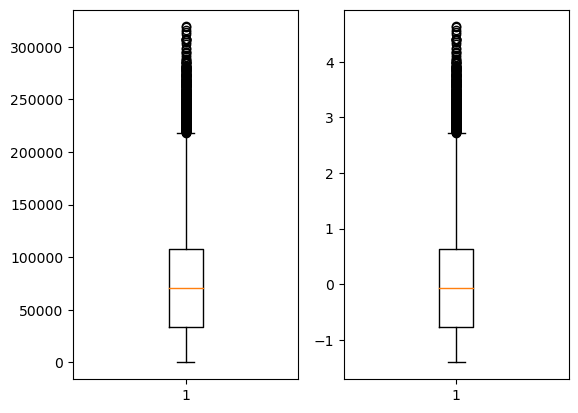

In [13]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage_Zscore'])
plt.show()

**using package:standadization**

In [4]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)


from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_Zscore']=ss.fit_transform(visa_df[['prevailing_wage']])
visa_df[["prevailing_wage","prevailing_wage_Zscore"]]

,prevailing_wage,prevailing_wage_Zscore
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


**normalization**

- read the data again
- step-1: read the column
- step-2: calculate min value
- step-3: calculate max value
- step-4: Nr=column-min
- step-5:Dr=max-min
- step-6:out=Nr/Dr
- step-7:savs in a column    

In [4]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)
min_val=visa_df['prevailing_wage'].min()
max_val=visa_df['prevailing_wage'].max()
Nr=visa_df['prevailing_wage']-min_val
Dr=max_val-min_val
out=Nr/Dr
visa_df['prevailing_wage_norm']=out
visa_df[['prevailing_wage','prevailing_wage_norm']]


,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [5]:
visa_df.iloc[[20575,21077]]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_norm
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.1367,Hour,Y,Certified,0.0
21077,EZYV21078,Asia,High School,N,N,442,2006,Midwest,319210.2700,Year,Y,Denied,1.0


**using package:minmaxscaler**

In [9]:
file_location="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_location)

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
visa_df['prevailing_wage_norm']=mms.fit_transform(visa_df[['prevailing_wage']])
visa_df[["prevailing_wage","prevailing_wage_norm"]]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


**fit_transform**

- there are two terms fit and transform
- if you see in z-score
  - x:data
  - mean: mean of data
  - std: std of dta
- will find the value of mean ans std,this is called fit
- once we find vale we need apply entire data,this is called transform
- fit tranform calculate the measurments(parameters or statistics) and apply on data
        

In [ ]:
**data transformation techniques**

$step-1$
**read the required packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$step-2$
**read the data**

$Exponential - data$ 

In [11]:
exp_data=np.random.exponential(size=1000)
exp_data[:10]
# we are consider exponential data set with ik random observations
# using numpy package

array([3.58503598, 0.39841396, 0.35075313, 0.37111591, 0.00836412,
       0.42183719, 0.42098599, 0.4650496 , 0.83450126, 1.20062207])

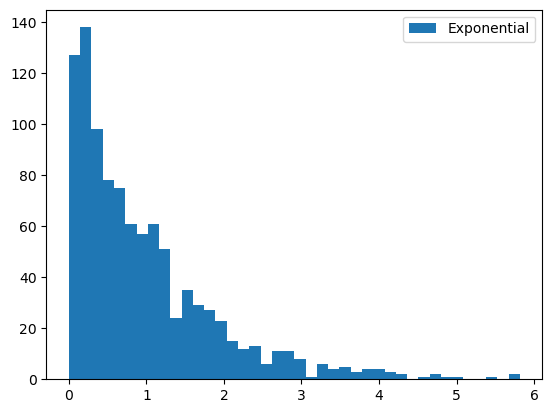

In [6]:
plt.hist(exp_data,bins=40,label='Exponential')
plt.legend()
plt.show()

In [31]:
exp_data=np.random.exponential(size=1000)
plt.hist(exp_data)

AttributeError: module 'numpy.random' has no attribute 'exp'

$step-3$
-**log transformation**

In [ ]:
- np. log is used for log transformation

In [7]:
log_data=np.log(exp_data)
log_data[:10]

array([-0.53594362,  0.18253747, -3.6189996 ,  0.52009563,  0.76997726,
       -1.52846643,  0.68117372,  0.45633711, -0.19524139,  0.66022591])

In [8]:
exp_data[:10]

array([0.5851169 , 1.20025913, 0.02680948, 1.68218851, 2.15971714,
       0.21686799, 1.97619587, 1.57828231, 0.82263606, 1.93522948])

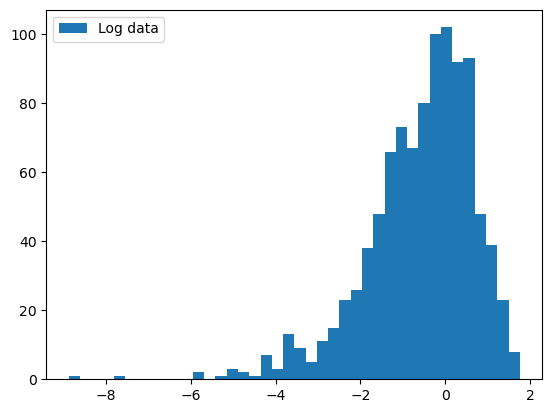

In [9]:
plt.hist(log_data,bins=40,label='Log data')
plt.legend()
plt.show()

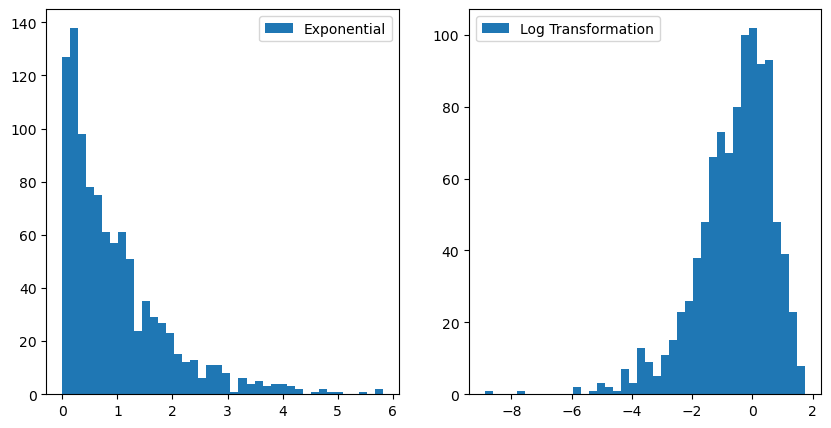

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).hist(exp_data,bins=40,label='Exponential')
plt.legend()
plt.subplot(1,2,2).hist(log_data,bins=40,label='Log Transformation')
plt.legend()
plt.show()    

$step-4$
- reciprocal transformation

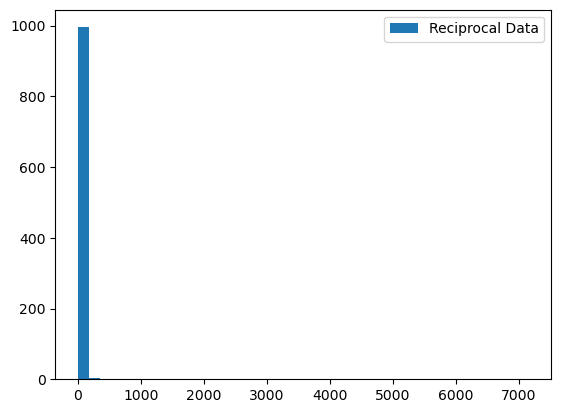

In [12]:
rec_data=np.reciprocal(exp_data)
plt.hist(rec_data,bins=40,label='Reciprocal Data')
plt.legend()
plt.show()

In [13]:
exp_data[:2]

array([0.5851169 , 1.20025913])

$step-5$
**sqareroot transformaion**

In [14]:
sqrt_data=np.sqrt(exp_data)

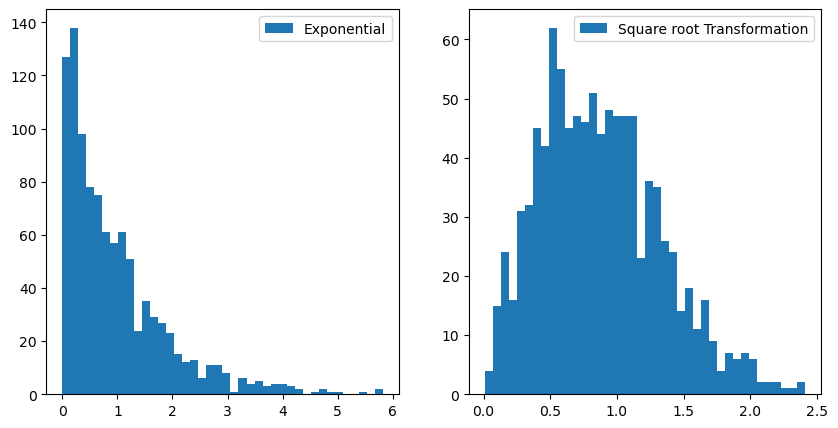

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).hist(exp_data,bins=40,label='Exponential')
plt.legend()
plt.subplot(1,2,2).hist(sqrt_data,bins=40,label='Square root Transformation')
plt.legend()
plt.show()    

D:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


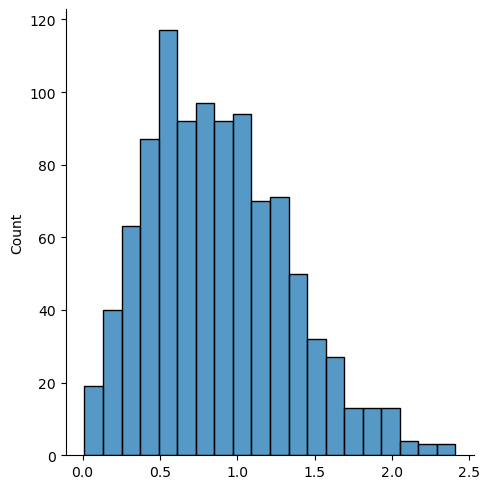

In [17]:
import seaborn as sns
sns.displot(sqrt_data)

$step-6$
**power transformer**
- it is related to sklearn package
- package name:skleran.preprocessing
- method name:power transformer
- inside box-cox,yeo-jhonson

In [18]:
exp_data

array([5.85116903e-01, 1.20025913e+00, 2.68094833e-02, 1.68218851e+00,
       2.15971714e+00, 2.16867995e-01, 1.97619587e+00, 1.57828231e+00,
       8.22636058e-01, 1.93522948e+00, 1.68456097e-01, 5.98665710e-01,
       1.81922970e-01, 1.47145424e-01, 9.77754986e-01, 1.07539403e+00,
       1.21277566e+00, 1.24667580e+00, 1.53660469e+00, 4.98765774e-01,
       6.96522173e-01, 2.83796441e-01, 5.68813351e-01, 5.00879397e-01,
       5.86315929e-01, 1.91413680e+00, 1.34086854e+00, 2.71245453e-01,
       6.45596076e-01, 2.27033129e-01, 6.58322862e-01, 2.74519328e-02,
       8.56833973e-02, 1.01677466e+00, 1.98994427e+00, 3.45126446e+00,
       4.04056243e-01, 6.42823331e-01, 1.13534375e-01, 1.86645497e+00,
       1.16674284e+00, 4.02699461e+00, 6.63445024e-01, 1.24019172e+00,
       2.63286096e-01, 6.93750197e-01, 1.62802409e+00, 1.49426269e+00,
       4.63360808e-01, 1.13944035e+00, 1.81743147e+00, 3.12604646e-01,
       1.10148890e+00, 1.98160504e+00, 2.84126968e-01, 3.66013725e-01,
      

In [13]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt_data=pt.fit([exp_data]).transform([exp_data])

In [14]:
pt_data

array([[ 0.00000000e+00,  1.11022302e-16,  0.00000000e+00,
        -5.55111512e-17,  5.37764278e-17,  5.55111512e-17,
        -5.55111512e-17, -1.11022302e-16,  0.00000000e+00,
         0.00000000e+00, -6.93889390e-17,  2.22044605e-16,
         0.00000000e+00,  0.00000000e+00, -4.44089210e-16,
         8.32667268e-17,  2.77555756e-17,  1.11022302e-16,
         2.22044605e-16,  1.11022302e-16, -1.11022302e-16,
         5.55111512e-17, -2.22044605e-16, -4.44089210e-16,
        -2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
        -2.22044605e-16,  1.11022302e-16,  0.00000000e+00,
         5.55111512e-17,  0.00000000e+00,  9.71445147e-17,
         3.46944695e-18,  1.11022302e-16, -1.11022302e-16,
         0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
        -8.32667268e-17, -2.77555756e-17,  1.11022302e-16,
         5.55111512e-17, -2.77555756e-17,  0.00000000e+00,
        -6.93889390e-17,  8.32667268e-17,  1.11022302e-16,
         1.11022302e-16,  0.00000000e+00,  0.00000000e+0

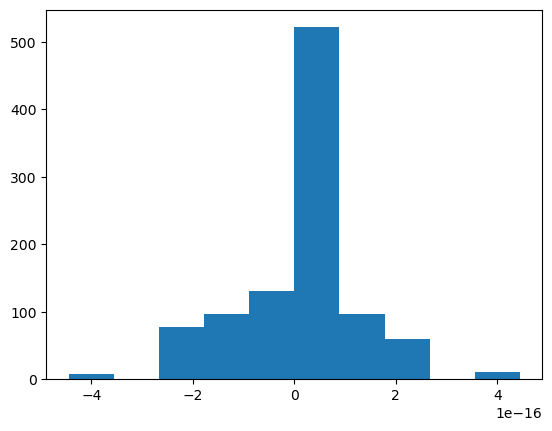

In [15]:
plt.hist(pt_data[0])
plt.show()